# 3.2 Hierarchical Clustering: Guided Practice

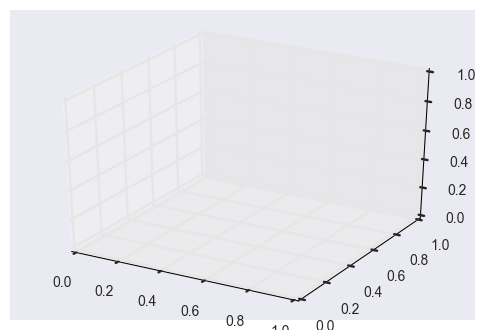

In [40]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os
from scipy.cluster.hierarchy import fcluster
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## Part 1: Format the data

#### 1.1 Import the iris data

In [3]:
data = pd.read_csv("../../assets/datasets/iris.csv")

In [4]:
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


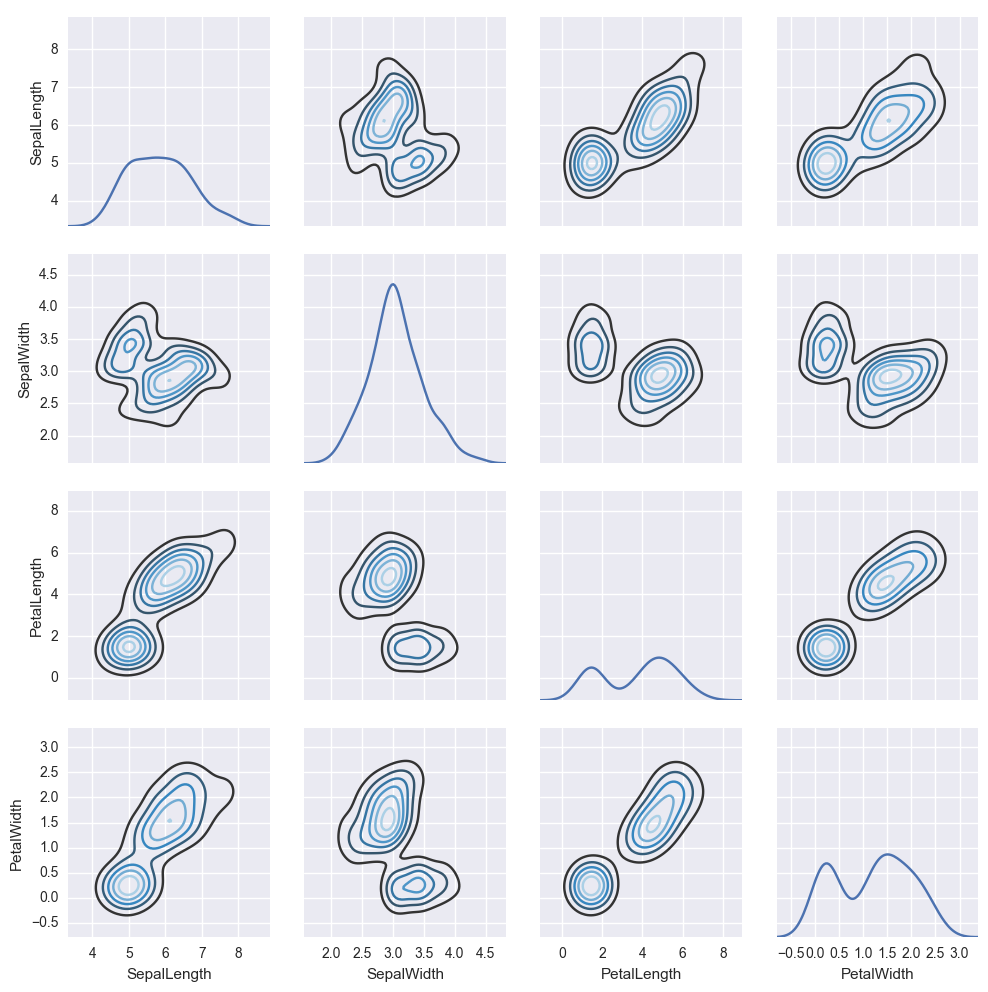

In [30]:
plot = sns.PairGrid(data)
plot.map_diag(sns.kdeplot)
plot.map_offdiag(sns.kdeplot, cmap='Blues_d', n_levels = 6)


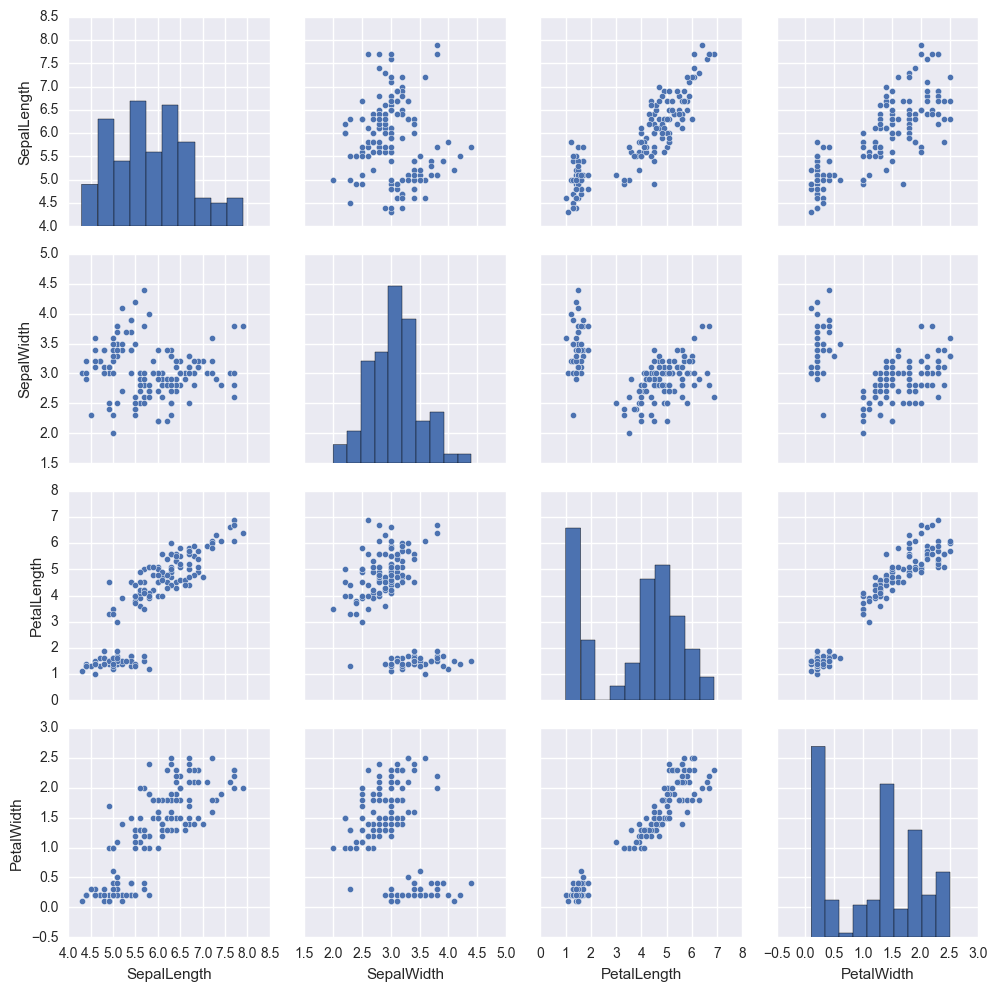

In [5]:
sns.pairplot(data)

#### 1.2 Convert the data to a pandas dataframe and format the data

Next, since we have categorical data, let's go ahead and covert that data to numeric dummy variables

In [6]:
X = data.drop('Name', axis = 1)

In [7]:
Z = linkage(X,'ward')


In [8]:
pd.DataFrame(Z, columns = ["1index", "2index", "distance", "originalobservations"])

,1index,2index,distance,originalobservations
0,9.0,34.0,0.000000,2.0
1,37.0,150.0,0.000000,3.0
2,101.0,142.0,0.000000,2.0
3,7.0,39.0,0.100000,2.0
4,0.0,17.0,0.100000,2.0
5,128.0,132.0,0.100000,2.0
6,10.0,48.0,0.100000,2.0
7,19.0,21.0,0.141421,2.0
8,29.0,30.0,0.141421,2.0
9,57.0,93.0,0.141421,2.0


#### 1.3 Plot the data

Let's take a look at some of the clusters to get a feel for our data: 

Lastly, let's create a matrix to pass to the clustering algorithm 

## Part 2: Hierarchical Clustering

Now, let's perform the actual clustering on our set

In [9]:
c, coph_dists = cophenet(Z, pdist(X))

In [10]:
c

0.87260152506447042

In [11]:
z1 = linkage(X, 'single')

#### 2.1 Cophenetic Coefficient

Now, calculate the cophenetic correlation coefficient:

In [12]:
pd.DataFrame(Z, columns = ["1index", "2index", "distance", "originalobservations"])

,1index,2index,distance,originalobservations
0,9.0,34.0,0.000000,2.0
1,37.0,150.0,0.000000,3.0
2,101.0,142.0,0.000000,2.0
3,7.0,39.0,0.100000,2.0
4,0.0,17.0,0.100000,2.0
5,128.0,132.0,0.100000,2.0
6,10.0,48.0,0.100000,2.0
7,19.0,21.0,0.141421,2.0
8,29.0,30.0,0.141421,2.0
9,57.0,93.0,0.141421,2.0


## Part 3: Calculate the dendrogram

#### 3.1 Plot the dendrogram

**Question:** What can we tell about the clusters by visually inspecting them?

We can see that there are two primary clusters, the green cluster and the red cluster, as well as the green cluster only contains values < 50 while the red cluster contrains values > 50

Since we can't derive much information from this larger dendrogram, let's plot a truncated version of the dendrogram

In [17]:
methods = ['single', 'ward', 'average', 'centroid', 'complete', 'median']
for m in methods:
    Z = linkage(X, m)
    c, coph_dists = cophenet(Z, pdist(X))
    print m, c

single 0.86357244036
ward 0.872601525064
average 0.876696652921
centroid 0.876505226286
complete 0.727170309992
median 0.738210135194


#### 3.2 Calculate the cluster labels

In [24]:
df = pd.DataFrame(c, columns = methods)

PandasError: DataFrame constructor not properly called!

In [18]:
cophen_coefs.plot(kind='barh')

NameError: name 'cophen_coefs' is not defined

#### 3.3 Plot the resulting clusters

In [ ]:
plt.fiqure(figsize=(30,15))
plt

In [26]:
max_dist = 1.5
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

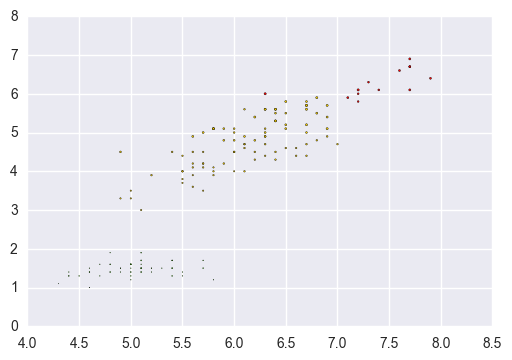

In [31]:
plt.scatter(X.SepalLength,X.PetalLength,X.PetalWidth, c=clusters, cmap='prism')
plt.show()

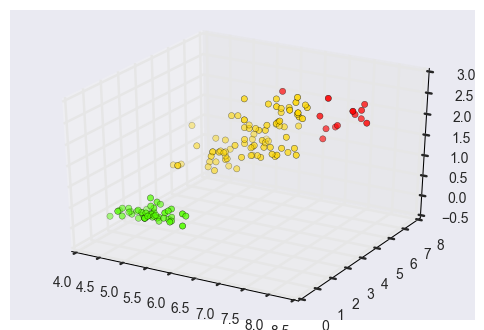

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X.SepalLength, X.PetalLength, X.PetalWidth, c= clusters, cmap= 'prism')
plt.show()